<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Automating Raster Analysis with Python 

Let's import the `GDAL` module  
and also `pyplot` from `matplotlib`

In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import os


Now, we need to look for all the tif files in out data folder, and tell it to add them to an array to go through.

In [4]:
rasters = []
for a_file in os.listdir("data"):
    if a_file.endswith(".tif"):
        rasters.append(a_file)
print(rasters)


['la_coast.tif', 'LA_Area.tif', 'la_alos.tif']


First, we'll use `GDAL` to open a Digital Elevation Model (DEM) file from the array we created, and select the appropriate band.

Convert raster to array and convert elevation values from meters to feet.

Create a list with four positive sea level rise values (in feet)

la_coast.tif


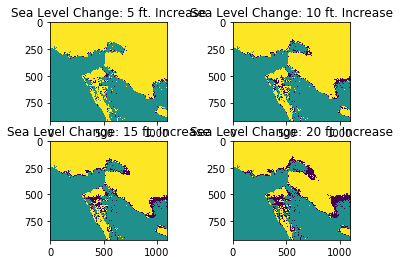

LA_Area.tif


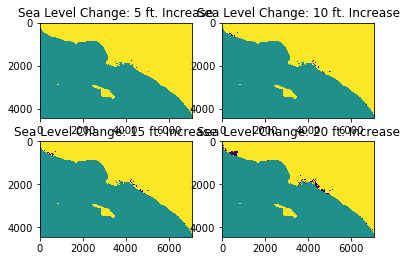

la_alos.tif


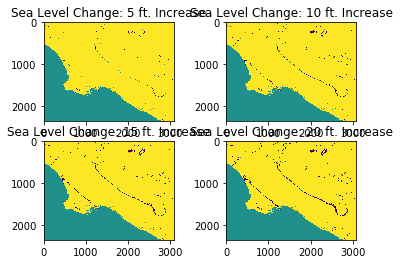

In [6]:
for rfile in rasters:
    print(rfile)
    dem = gdal.Open("./data/"+rfile)
    band = dem.GetRasterBand(1)
    elev_array_m = band.ReadAsArray()
    elev_array_f = elev_array_m * 3.28
    change_levels = [5, 10, 15, 20]
    for idx, change in enumerate(change_levels):
        elevation = (elev_array_f > change) * 2 - (elev_array_f > 0) * 1
        plt.subplot(2, 2, idx + 1)
        plt.title('Sea Level Change: ' + str(change) + ' ft. Increase')
#         plt.contourf(x,y,z,colors,cmap="gist_earth")
        plt.imshow(elevation)

    plt.show()

For each sea level rise value, create a subplot (in a 4x4 grid) showing areas that might be inundated in each scenario, and add a plot title.

Within subplot: set up raster to show three separate colors: areas above the changed sea level, areas between the changed and present sea levels (possibly inundated), and areas at or below present sea level.

Then show grid of four subplots

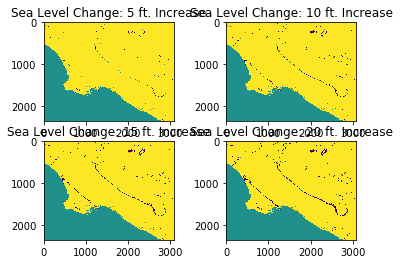